In [108]:

import openpyxl
import numpy as np

# Path to the Excel file
path = 'C:/Users/wkhellaf/Desktop/Work_Walid_laptop/6_Article _PFDC/Data/Mosim_All2019_2022_Filiale.xlsx'

# Load the Excel workbook
excel = openpyxl.load_workbook(path)

# Access the specified worksheet
worksheet_ex = excel['DataBrut'] #DataBrut  ex 

# Initialize parameters
height = 49    # Number of rows to read
step = 2      # Offset for writing
num_plans = 150 # Number of plans
data = np.zeros((num_plans, height + num_plans))  # Matrix for absolute deviations

# Structuring the data
print(data.shape, data.shape[0])

# Fill the data matrix
for i in range(data.shape[0]):  # Iterate over each plan
    for t in range(i, height + i):  # Fill the columns
        # Read the value from the cell and convert it to an integer
        cell_value = worksheet_ex.cell(step + i, step + t).value
       # Check if the cell value is not None before converting to an integer
        if cell_value is not None:
            data[i, t] = int(cell_value)  # Convert to integer
        else:
            data[i, t] = 0  # Handle missing values by setting them to 0 (or any default value)

    # Replicate the achieved quantity in the remaining rows
    data[i:, i] = data[i, i]  
    
    # Calculate the cumulative quantities
    data[i, :] = np.cumsum(data[i, :])

# Display the data
print(data)

# Send the cumulative data to a new Excel sheet
worksheet_ba_c = excel['O_Data_Cumule']
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        # Write the data to the appropriate cell
        worksheet_ba_c.cell(step + i, step + j, data[i, j])

# Save changes to the Excel file
excel.save(path)

(150, 199) 150
[[  8280.  10674.  13068. ... 130502. 130502. 130502.]
 [  8280.  16032.  18426. ... 135860. 135860. 135860.]
 [  8280.  16032.  23268. ... 140702. 140702. 140702.]
 ...
 [  8280.  16032.  23268. ... 601300. 601300. 601300.]
 [  8280.  16032.  23268. ... 369688. 369688. 369688.]
 [  8280.  16032.  23268. ... 369688. 369688. 369688.]]


In [26]:
print(shape(data),shape(data)[0])

(11, 18) 11


In [109]:
print(shape(data), shape(data)[0])  # Display the shape of the data

# 2. Matrix of absolute deviations between levels
MatEcrRltv = np.zeros((num_plans, height))  # Absolute deviation matrix

# Loop through the rows of the table
for i in range(0, num_plans - 1): 
    for j in range(0, height - 1):
        ii = i
        jj = j + 1 + ii
        if j == 0:
            # Check if the value is not zero and calculate the relative deviation
            if data[ii, jj] != 0:
                MatEcrRltv[i, j] = (data[ii + 1, jj] / data[ii, jj]) - 1  # (A - D) / D
        else:
            # Check if the value is not zero and calculate the relative deviation
            if data[ii, jj] != 0:
                MatEcrRltv[i, j] = (data[ii + 1, jj] / data[ii, jj]) - 1  # (A - D) / D  

# Round the deviation matrix to 2 decimal places
MatEcrRltv = np.around(MatEcrRltv, 2)

# Create a DataFrame for the deviation matrix
dEA = pd.DataFrame(MatEcrRltv)

# Rename columns and index for clarity
dEA = dEA.rename(columns=lambda x: "h%d" % x)
dEA = dEA.rename(index=lambda x: "i_%d" % x)

# Print the DataFrame
print(dEA)

# Send the cumulative data to a new Excel sheet
worksheet_Output = excel['O_Data_Dev']
for i in range(MatEcrRltv.shape[0]):
    for j in range(MatEcrRltv.shape[1]):
        # Write the data to the appropriate cell
        worksheet_Output.cell(step + i, step + j, MatEcrRltv[i, j])

# Save changes to the Excel file
excel.save(path)

(150, 199) 150
          h0    h1    h2    h3    h4    h5    h6    h7    h8    h9  ...   h39  \
i_ 0    0.50  0.41  0.36  0.36  0.36  0.25  0.25  0.25  0.13  0.13  ...  0.05   
i_ 1    0.26  0.24  0.24  0.24  0.18  0.18  0.18  0.10  0.10  0.10  ...  0.04   
i_ 2    0.21  0.21  0.21  0.16  0.16  0.16  0.10  0.10  0.10  0.10  ...  0.04   
i_ 3    0.13  0.13  0.14  0.14  0.14  0.09  0.09  0.09  0.09  0.16  ...  0.12   
i_ 4    0.04  0.03  0.03  0.03  0.02  0.02  0.02  0.02  0.02  0.02  ...  0.01   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
i_ 145  0.00  0.00  0.00  0.00  0.00 -0.00 -0.01 -0.01 -0.01 -0.01  ... -0.01   
i_ 146  0.00  0.00  0.00  0.00  0.00 -0.01 -0.01 -0.01 -0.01 -0.01  ... -0.01   
i_ 147  0.00  0.00  0.00  0.00  0.00  0.00 -0.02 -0.03 -0.05 -0.07  ... -0.35   
i_ 148  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
i_ 149  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   

         h40

      h0   h1   h2   h3   h4   h5   h6   h7   h8   h9  ...  h39  h40  h41  \
h0   1.0  0.8  0.8  0.7  0.7  0.7  0.7  0.7  0.6  0.6  ...  0.5  0.5  0.5   
h1   0.8  1.0  0.9  0.7  0.7  0.7  0.7  0.7  0.7  0.7  ...  0.5  0.5  0.5   
h2   0.8  0.9  1.0  0.8  0.7  0.7  0.7  0.7  0.7  0.7  ...  0.5  0.5  0.5   
h3   0.7  0.7  0.8  1.0  0.9  0.8  0.8  0.8  0.7  0.7  ...  0.6  0.6  0.6   
h4   0.7  0.7  0.7  0.9  1.0  0.8  0.8  0.8  0.7  0.8  ...  0.6  0.6  0.6   
h5   0.7  0.7  0.7  0.8  0.8  1.0  0.8  0.8  0.8  0.8  ...  0.6  0.6  0.6   
h6   0.7  0.7  0.7  0.8  0.8  0.8  1.0  0.9  0.8  0.8  ...  0.6  0.6  0.6   
h7   0.7  0.7  0.7  0.8  0.8  0.8  0.9  1.0  0.9  0.8  ...  0.6  0.6  0.6   
h8   0.6  0.7  0.7  0.7  0.7  0.8  0.8  0.9  1.0  0.9  ...  0.6  0.6  0.6   
h9   0.6  0.7  0.7  0.7  0.8  0.8  0.8  0.8  0.9  1.0  ...  0.6  0.6  0.6   
h10  0.6  0.6  0.7  0.7  0.7  0.8  0.8  0.8  0.8  0.9  ...  0.7  0.6  0.6   
h11  0.6  0.6  0.6  0.7  0.7  0.7  0.8  0.8  0.8  0.8  ...  0.7  0.7  0.6   

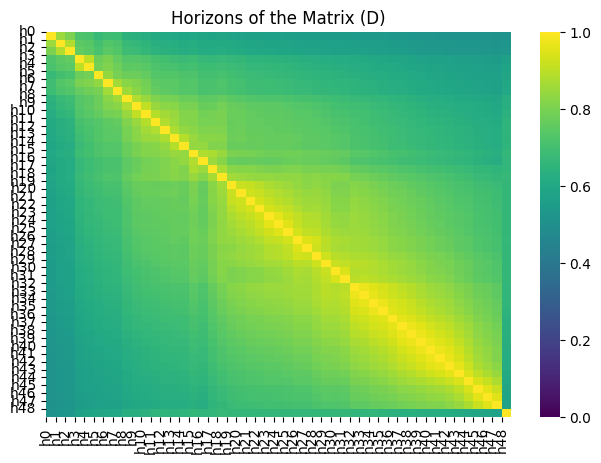

In [116]:
# Compute the similarity matrix using Euclidean distance
dd = SimilaritPardistEclu(dEA)

# Print the similarity matrix, rounded to 1 decimal place
print(np.around(dd, decimals=1))

# Create a figure with specified size
plt.figure(figsize=(7.5, 5))

# Plot the heatmap of the similarity matrix
# 'cmap' defines the color map, 'vmin' and 'vmax' set the color scale range
sn.heatmap(dd, annot=False, cmap="viridis", vmin=0, vmax=1)

# Set the x and y ticks to display the column names of dEA
plt.xticks(range(len(dEA.columns)), dEA.columns)
plt.yticks(range(len(dEA.columns)), dEA.columns)

# Add a title to the plot
plt.title("Horizons of the Matrix (D)")

# Show the plot
plt.show()

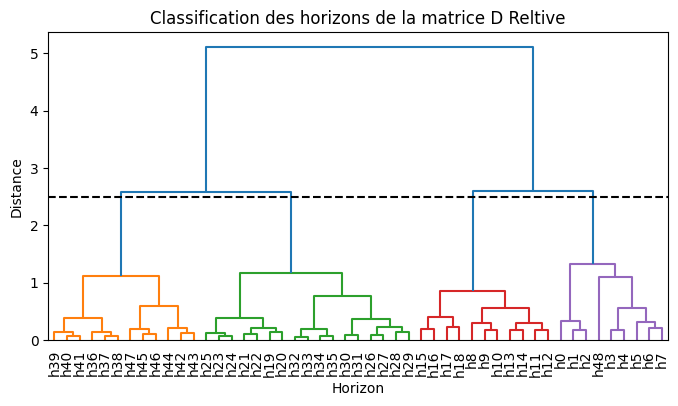

In [111]:
Z = hac.linkage(dd,  method='ward')#........................................#4- Classification de matrice de distance
plt.figure(figsize=(8, 4))
plt.title('Classification des horizons de la matrice D Reltive')
plt.xlabel('Horizon')
plt.ylabel('Distance')

line = 2.5 # Choisir la distance qui nous permet d'avoir 4 groupe sur le graphe ci-dissous
hac.dendrogram(Z,labels=dEA.columns,leaf_font_size=10., color_threshold=line)#20000
plt.axhline(y=line, c='black', linestyle='--');
plt.axhline(y=11, c='black');
plt.show()

In [123]:
# Suppose we want only three clusters
G_max = 3  # Maximum number of groups

# Create a DataFrame that assigns each level to a cluster
cluster_output = pd.DataFrame({
    "Level": dEA.columns.tolist(), 
    "Cluster": fcluster(Z, G_max, criterion='maxclust')
})

# Classify each level into a separate vector
g1 = cluster_output.loc[cluster_output['Cluster'] == 1, :]  # Levels in cluster 1
g2 = cluster_output.loc[cluster_output['Cluster'] == 2, :]  # Levels in cluster 2
g3 = cluster_output.loc[cluster_output['Cluster'] == 3, :]  # Levels in cluster 3

# Initialize empty lists to store data for each group
grp1 = []
grp2 = []
grp3 = []
grp4 = []

# Fill grp1 with the values from the DataFrame corresponding to cluster 1
for j in g1.index:
    for i in range(0, dEA.shape[0]):
        grp1.append(dEA.iloc[i, j])

# Fill grp2 with the values from the DataFrame corresponding to cluster 2
for j in g2.index:
    for i in range(0, dEA.shape[0]):
        grp2.append(dEA.iloc[i, j])

# Fill grp3 with the values from the DataFrame corresponding to cluster 3
for j in g3.index:
    for i in range(0, dEA.shape[0]):
        grp3.append(dEA.iloc[i, j])

# Sort the groups in ascending order
grp1 = sorted(grp1)
grp2 = sorted(grp2)
grp3 = sorted(grp3)
grp4 = sorted(grp4)

# Create a DataFrame with summary statistics for each group
StatDisc = pd.DataFrame({
    'Min': [np.min(grp2), np.min(grp3), np.min(grp1)],
    'Q1': [np.quantile(grp2, 0.25, interpolation='midpoint'), 
           np.quantile(grp3, 0.25, interpolation='midpoint'), 
           np.quantile(grp1, 0.25, interpolation='midpoint')], 
    'Q2': [np.quantile(grp2, 0.50, interpolation='midpoint'), 
           np.quantile(grp3, 0.50, interpolation='midpoint'), 
           np.quantile(grp1, 0.50, interpolation='midpoint')], 
    'Mean': [np.mean(grp2), np.mean(grp3), np.mean(grp1)],
    'Std Dev': [np.std(grp2), np.std(grp3), np.std(grp1)],
    'Q3': [np.quantile(grp2, 0.75, interpolation='midpoint'), 
           np.quantile(grp3, 0.75, interpolation='midpoint'), 
           np.quantile(grp1, 0.75, interpolation='midpoint')], 
    'Max': [np.max(grp2), np.max(grp3), np.max(grp1)],
    'N': [len(grp2), len(grp3), len(grp1)]
}, index=['Group 1:', 'Group 2:', 'Group 3:'])

# Round the statistical values to 2 decimal places
StatDisc = np.around(StatDisc, 2)

# Print the groups for verification
print("Group 1: ", g2.iloc[:, 0].to_numpy())
print("Group 2: ", g3.iloc[:, 0].to_numpy())
print("Group 3: ", g1.iloc[:, 0].to_numpy(), "\n")

# Collect all data from the matrix into the Full list
Full = []
for i in range(0, dEA.shape[0]):
    for j in range(0, dEA.shape[1]):
        Full.append(dEA.iloc[i, j])

# Sort all values from the Full list
Full = np.sort(Full)

# Create a DataFrame with summary statistics for the entire matrix (D)
StatDiscFull = pd.DataFrame({
    'Min': [np.min(Full)],
    'Q1': [np.quantile(Full, 0.25, interpolation='midpoint')],
    'Q2': [np.quantile(Full, 0.50, interpolation='midpoint')],
    'Mean': [np.mean(Full)],
    'Std Dev': [np.std(Full)],
    'Q3': [np.quantile(Full, 0.75, interpolation='midpoint')],
    'Max': [np.max(Full)],
    'N': [len(Full)]
}, index=['Full set:'])

# Print summary statistics for the full matrix
print("Statistical Information on Matrix (D):")
print(StatDiscFull, "\n")

# Print summary statistics for the subsets (groups)
print("Statistical Information on Subsets:")
print(StatDisc, "\n")

Group 1:  ['h8' 'h9' 'h10' 'h11' 'h12' 'h13' 'h14' 'h15' 'h16' 'h17' 'h18']
Group 2:  ['h0' 'h1' 'h2' 'h3' 'h4' 'h5' 'h6' 'h7' 'h48']
Group 3:  ['h19' 'h20' 'h21' 'h22' 'h23' 'h24' 'h25' 'h26' 'h27' 'h28' 'h29' 'h30'
 'h31' 'h32' 'h33' 'h34' 'h35' 'h36' 'h37' 'h38' 'h39' 'h40' 'h41' 'h42'
 'h43' 'h44' 'h45' 'h46' 'h47'] 

Statistical Information on Matrix (D):
            Min    Q1   Q2      Mean   Std Dev    Q3  Max     N
Full set: -0.39 -0.01  0.0  0.001829  0.048868  0.01  0.5  7350 

Statistical Information on Subsets:
           Min    Q1   Q2  Mean  Std Dev    Q3   Max     N
Group 1: -0.28 -0.01  0.0  0.00     0.04  0.01  0.26  1650
Group 2: -0.33 -0.01  0.0  0.01     0.06  0.00  0.50  1350
Group 3: -0.39 -0.01 -0.0  0.00     0.05  0.01  0.33  4350 



In [154]:
def analyze_clusters(num_clusters, dEA, Z):
    """
    Function to analyze and display statistical information for a given number of clusters.
    
    :param num_clusters: The number of clusters to be created.
    :param dEA: Data matrix.
    :param Z: The linkage matrix for hierarchical clustering.
    """
    # Define the maximum number of groups (clusters)
    G_max = num_clusters
    
    # Create a DataFrame that assigns each level (column) to a cluster
    cluster_output = pd.DataFrame({
        "Level": dEA.columns.tolist(), 
        "Cluster": fcluster(Z, G_max, criterion='maxclust')
    })
    
    # Initialize lists to store data for each group
    group_data = {}
    
    # Dynamically create and store groups based on the number of clusters
    for group_num in range(1, G_max + 1):
        group_data[group_num] = cluster_output.loc[cluster_output['Cluster'] == group_num, :]
    
    # Initialize lists to hold data for each group
    group_values = {i: [] for i in range(1, G_max + 1)}

    # Collect data for each group
    for group_num in range(1, G_max + 1):
        for j in group_data[group_num].index:
            for i in range(0, dEA.shape[0]):
                group_values[group_num].append(dEA.iloc[i, j])
    
    # Sort values in each group
    for group_num in range(1, G_max + 1):
        group_values[group_num] = sorted(group_values[group_num])
    
    # Create a DataFrame with summary statistics for each group
    summary_stats = {
        'Min': [],
        'Q1': [],
        'Q2': [],
        'Mean': [],
        'Std Dev': [],
        'Q3': [],
        'Max': [],
        'N': []
    }

    for group_num in range(1, G_max + 1):
        summary_stats['Min'].append(np.min(group_values[group_num]))
        summary_stats['Q1'].append(np.quantile(group_values[group_num], 0.25, interpolation='midpoint'))
        summary_stats['Q2'].append(np.quantile(group_values[group_num], 0.50, interpolation='midpoint'))
        summary_stats['Mean'].append(np.mean(group_values[group_num]))
        summary_stats['Std Dev'].append(np.std(group_values[group_num]))
        summary_stats['Q3'].append(np.quantile(group_values[group_num], 0.75, interpolation='midpoint'))
        summary_stats['Max'].append(np.max(group_values[group_num]))
        summary_stats['N'].append(len(group_values[group_num]))
    
    # Create a DataFrame to display the statistics for each group
    StatDisc = pd.DataFrame(summary_stats, index=[f'Group {i}:' for i in range(1, G_max + 1)])
    StatDisc = np.around(StatDisc, 2)
    
    # Print group details for each cluster
    for group_num in range(1, G_max + 1):
        print(f"Group {group_num}: ", group_data[group_num].iloc[:, 0].to_numpy(), "\n")
    
    # Collect all data from the matrix into the Full list
    Full = []
    for i in range(0, dEA.shape[0]):
        for j in range(0, dEA.shape[1]):
            Full.append(dEA.iloc[i, j])

    # Sort all values from the Full list
    Full = np.sort(Full)

    # Create a DataFrame with summary statistics for the entire matrix (Full set)
    StatDiscFull = pd.DataFrame({
        'Min': [np.min(Full)],
        'Q1': [np.quantile(Full, 0.25, interpolation='midpoint')],
        'Q2': [np.quantile(Full, 0.50, interpolation='midpoint')],
        'Mean': [np.mean(Full)],
        'Std Dev': [np.std(Full)],
        'Q3': [np.quantile(Full, 0.75, interpolation='midpoint')],
        'Max': [np.max(Full)],
        'N': [len(Full)]
    }, index=['Full set:'])

    # Print summary statistics for the full matrix
    print("Statistical Information on Matrix (D):")
    print(StatDiscFull, "\n")
    
    # Print summary statistics for the subsets (groups)
    print("Statistical Information on Subsets:")
    print(StatDisc, "\n")


# Example of how to call the function
analyze_clusters(3, dEA, Z)  # Here, 3 is the number of clusters you want to analyze

Group 1:  ['h19' 'h20' 'h21' 'h22' 'h23' 'h24' 'h25' 'h26' 'h27' 'h28' 'h29' 'h30'
 'h31' 'h32' 'h33' 'h34' 'h35' 'h36' 'h37' 'h38' 'h39' 'h40' 'h41' 'h42'
 'h43' 'h44' 'h45' 'h46' 'h47'] 

Group 2:  ['h8' 'h9' 'h10' 'h11' 'h12' 'h13' 'h14' 'h15' 'h16' 'h17' 'h18'] 

Group 3:  ['h0' 'h1' 'h2' 'h3' 'h4' 'h5' 'h6' 'h7' 'h48'] 

Statistical Information on Matrix (D):
            Min    Q1   Q2      Mean   Std Dev    Q3  Max     N
Full set: -0.39 -0.01  0.0  0.001829  0.048868  0.01  0.5  7350 

Statistical Information on Subsets:
           Min    Q1   Q2  Mean  Std Dev    Q3   Max     N
Group 1: -0.39 -0.01 -0.0  0.00     0.05  0.01  0.33  4350
Group 2: -0.28 -0.01  0.0  0.00     0.04  0.01  0.26  1650
Group 3: -0.33 -0.01  0.0  0.01     0.06  0.00  0.50  1350 



C:\Users\wkhellaf\AppData\Local\Temp\ipykernel_27900\3810729643.py:99: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  analyze_clusters(3, dEA, Z)  # Here, 3 is the number of clusters you want to analyze


In [133]:
print(dEA.shape[1])

49


In [138]:
# Initialize a matrix to store all the information related to a deviation level
MatRes = np.zeros((dEA.shape[1], 8))  # The matrix will contain information for each deviation level

# Fill the matrix for group 3
for i in g3.index:
    MatRes[i, 0] = i + 1  # Deviation level index (1-based)
    MatRes[i, 1] = np.min(grp3)  # Minimum value of group 3
    MatRes[i, 2] = np.quantile(grp3, 0.25, interpolation='midpoint')  # First quartile (Q1) of group 3
    MatRes[i, 3] = np.quantile(grp3, 0.50, interpolation='midpoint')  # Median (Q2) of group 3
    MatRes[i, 4] = np.mean(grp3)  # Mean value of group 3
    MatRes[i, 5] = np.std(grp3)  # Standard deviation (E-type) of group 3
    MatRes[i, 6] = np.quantile(grp3, 0.75, interpolation='midpoint')  # Third quartile (Q3) of group 3
    MatRes[i, 7] = np.max(grp3)  # Maximum value of group 3

# Fill the matrix for group 1
for i in g1.index:
    MatRes[i, 0] = i + 1  # Deviation level index (1-based)
    MatRes[i, 1] = np.min(grp1)  # Minimum value of group 1
    MatRes[i, 2] = np.quantile(grp1, 0.25, interpolation='midpoint')  # First quartile (Q1) of group 1
    MatRes[i, 3] = np.quantile(grp1, 0.50, interpolation='midpoint')  # Median (Q2) of group 1
    MatRes[i, 4] = np.mean(grp1)  # Mean value of group 1
    MatRes[i, 5] = np.std(grp1)  # Standard deviation (E-type) of group 1
    MatRes[i, 6] = np.quantile(grp1, 0.75, interpolation='midpoint')  # Third quartile (Q3) of group 1
    MatRes[i, 7] = np.max(grp1)  # Maximum value of group 1

# Fill the matrix for group 2
for i in g2.index:
    MatRes[i, 0] = i + 1  # Deviation level index (1-based)
    MatRes[i, 1] = np.min(grp2)  # Minimum value of group 2
    MatRes[i, 2] = np.quantile(grp2, 0.25, interpolation='midpoint')  # First quartile (Q1) of group 2
    MatRes[i, 3] = np.quantile(grp2, 0.50, interpolation='midpoint')  # Median (Q2) of group 2
    MatRes[i, 4] = np.mean(grp2)  # Mean value of group 2
    MatRes[i, 5] = np.std(grp2)  # Standard deviation (E-type) of group 2
    MatRes[i, 6] = np.quantile(grp2, 0.75, interpolation='midpoint')  # Third quartile (Q3) of group 2
    MatRes[i, 7] = np.max(grp2)  # Maximum value of group 2

# Round the matrix to 2 decimal places for readability
MatRes = np.around(MatRes, 2)

# Convert the matrix into a DataFrame for better presentation
MatRes = pd.DataFrame(MatRes)

# Rename the index to represent the deviation levels (H1, H2, H3, etc.)
MatRes = MatRes.rename(index=lambda x: f"H{x}")

# Add a suffix "_S" to each column for clarity
MatRes = MatRes.add_suffix('_S')

# Rename the columns with meaningful labels
MatRes = MatRes.rename(columns={
    '0_S': "D",  # Deviation level index
    '1_S': "Min",  # Minimum
    '2_S': "Q1",  # First quartile
    '3_S': "Q2",  # Median (second quartile)
    '4_S': "Mean",  # Mean
    '5_S': "Std Dev",  # Standard deviation (E-type)
    '6_S': "Q3",  # Third quartile
    '7_S': "Max"  # Maximum
})

# Print the first 5 rows of the formatted DataFrame
print(MatRes.head())

      D   Min    Q1   Q2  Mean  Std Dev   Q3  Max
H0  1.0 -0.33 -0.01  0.0  0.01     0.06  0.0  0.5
H1  2.0 -0.33 -0.01  0.0  0.01     0.06  0.0  0.5
H2  3.0 -0.33 -0.01  0.0  0.01     0.06  0.0  0.5
H3  4.0 -0.33 -0.01  0.0  0.01     0.06  0.0  0.5
H4  5.0 -0.33 -0.01  0.0  0.01     0.06  0.0  0.5


In [168]:
def estimate_plan(plan_num, data, MatRes, Full, height):
    """
    Function to estimate and plot the uncertainty for a given planning plan.

    Parameters:
    - plan_num: The plan number to be estimated (index-based).
    - data: The full data matrix.
    - MatRes: DataFrame containing statistical measures for each deviation level.
    - Full: Full set of deviation values.
    - height: The number of weeks (or periods) in the plan horizon.

    Returns:
    - A plot showing the estimated uncertainty for the given plan.
    """

    # Extract the specific plan from the data based on the plan number
    planXX = data[plan_num, 0:height]  # Example: take plan_num-th plan
    planMin = []
    planMax = []

    # Print the plan to check the values
    print(f"Plan {plan_num}: {planXX}")

    # Calculate Min and Max estimates for each period in the plan using MatRes
    for i in range(0, MatRes.shape[0]):
        planMin.append(planXX[i] * (1 + MatRes.iloc[i, 2]))  # Min estimate using Q1 (2nd column)
        planMax.append(planXX[i] * (1 + MatRes.iloc[i, 7]))  # Max estimate using Max (7th column)

    # Convert the Min/Max lists to numpy arrays for easier handling
    planMin = np.array(planMin)
    planMax = np.array(planMax)

    # Full dataset-based Min and Max values (for the whole dataset)
    maxx = planXX * (1 + np.max(Full))
    minn = planXX * (1 + np.min(Full))

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(minn, "r", label="Min_Full")  # Full data Min line
    plt.plot(planMin, "r--", label="Min_CAH")  # Cluster-based Min line
    plt.plot(planXX, "b:o", label=f"Plan {plan_num}")  # Original plan line
    plt.plot(planMax, "g--", label="Max_CAH")  # Cluster-based Max line
    plt.plot(maxx, "g", label="Max_Full")  # Full data Max line

    # Set plot limits and labels
    plt.xlim(0, height + 1)
    plt.title(f"Uncertainty for Plan {plan_num} using Matrix D")
    plt.xlabel("Weeks for Delivery")
    plt.ylabel("Cumulative Quantity")
    plt.legend()
    
    # Show the plot
    plt.show()

# Example of calling the function:
# estimate_plan(plan_num=12, data=data, MatRes=MatRes, Full=Full, height=height)

150
147
[  8280.  16032.  18426.  20120.  20120.  20120.  26492.  26510.  26510.
  46688.  46724.  46760.  46796.  52232.  52268.  52304.  52322.  53096.
  56804.  60494.  64202.  67910.  71762.  75614.  79484.  83336.  84704.
  86954.  89222.  91472.  93722.  96314.  98906. 101480. 104072. 106484.
 108896. 111308. 113702. 116096. 118490. 120884. 123260. 125672. 128210.
 130748. 133286. 135824. 135860.]
[12420.0, 24048.0, 27639.0, 30180.0, 30180.0, 30180.0, 39738.0, 39765.0, 33402.6, 58826.88, 58872.24, 58917.6, 58962.96, 65812.32, 65857.68000000001, 65903.04, 65925.72, 66900.96, 71573.04, 80457.02, 85388.66, 90320.3, 95443.46, 100566.62000000001, 105713.72, 110836.88, 112656.32, 115648.82, 118665.26000000001, 121657.76000000001, 124650.26000000001, 128097.62000000001, 131544.98, 134968.4, 138415.76, 141623.72, 144831.68000000002, 148039.64, 151223.66, 154407.68000000002, 157591.7, 160775.72, 163935.80000000002, 167143.76, 170519.30000000002, 173894.84, 177270.38, 180645.92, 203790.0]


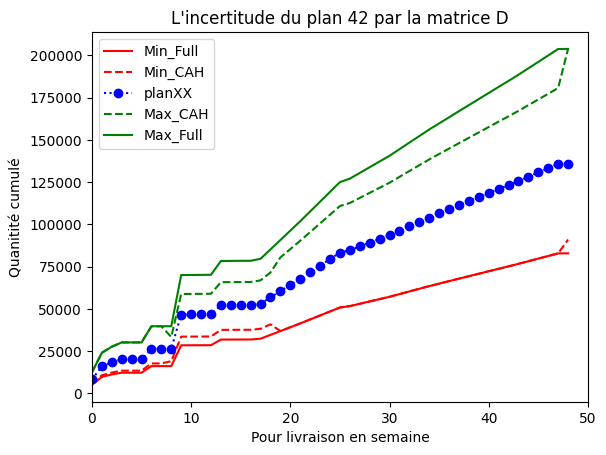

In [169]:
#Prennons par exemple le plans de plannification N°12 
print(data.shape[0])
print( data.shape[0]-3)
#planXX=data[data.shape[0]-10,data.shape[0]-10:data.shape[0]-10+height]; tacke un exemple of paln to estiamte
planXX=data[1,0:height];
planMin=[];planMax=[]
#print(40+TH+1+40)
print(planXX)

for i in range(0,MatRes.shape[0]):
    planMin.append(planXX[i]*(1+ MatRes.iloc[i,1]))#
    planMax.append(planXX[i]*(1+MatRes.iloc[i,7]))#
print(planMax)
maxx= planXX*(1+np.max(Full))
minn= planXX*(1+np.min(Full))
#print(minn.to_numpy())
#print(planMin)
plt.plot(minn,"r",label="Min_Full" )    
plt.plot(planMin,"r--",label="Min_CAH" )
plt.plot((planXX),"b:o",label="planXX")
plt.plot(planMax,"g--",label="Max_CAH")
plt.plot(maxx,"g",label="Max_Full" )   
plt.xlim(0, height+1)
plt.title("L'incertitude du plan 42 par la matrice D")
plt.xlabel("Pour livraison en semaine")
plt.ylabel("Quanitité cumulé")
plt.legend()

In [114]:
def SimilaritPardistEclu(df):
    from scipy.spatial import distance
    ar=np.zeros((df.shape[1],df.shape[1]))
    for i in range(0,df.shape[1]):
        for j in range(0,df.shape[1]):
            ar[i,j] = 1/ (1+ distance.euclidean(df.iloc[:,j], df.iloc[:,i]))
    dar = pd.DataFrame(ar); 
    dar=dar.rename(columns = lambda x : "h%d" % (x,));dar=dar.rename(index = lambda x :"h%d" % (x,))
    return dar

In [15]:
#Bibliothèque python
from pyomo.environ import *
import numpy as np; import pandas as pd; import matplotlib.pyplot as plt
import openpyxl; from random import randint;import random   
import pandas as pd;import numpy as np ;from pandas import DataFrame;import matplotlib.pyplot as plt
from sklearn.cluster import KMeans;import matplotlib.gridspec as gridspec
from pylab import *;from collections import Counter;from matplotlib.colors import Normalize;from matplotlib.cm import ScalarMappable
import random as rd;import scipy.cluster.hierarchy as hac
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster;import seaborn as sn
from sklearn import preprocessing;from pyomo.environ import *;from scipy import *;import numpy as np; import pandas as pd; import matplotlib.pyplot as plt
import openpyxl; from random import randint 
#Charger le chemin